In [4]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import seaborn as sns
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
N=5000
t_p=1000
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
q_g=0.99
p_max=30
alpha=np.zeros(p_max)
overlaps=np.zeros(p_max)

In [5]:
# Structral connectivity matrix
#Firing rate pattern
C=np.zeros((N,N),dtype='int8')
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1
# initial firing rate
r0=np.random.uniform(0,5,N)
print(r0)

[3.67634059 3.36983733 4.40715801 ... 3.26221564 0.19491983 2.03335675]


p=1
p=2
p=3
p=4
p=5
p=6
p=7
p=8
p=9
p=10
p=11
p=12
p=13
p=14
p=15
p=16
p=17
p=18
p=19
p=20
p=21
p=22
p=23
p=24
p=25
p=26
p=27
p=28
p=29
p=30


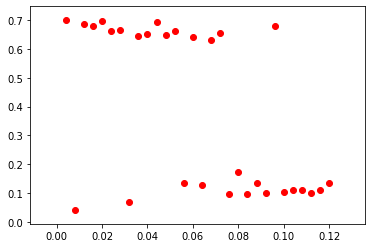

In [6]:
for p in range(1,p_max+1):
    print('p='+str(p))
    xi_pattern=np.random.normal(0,1,size=(p,N))
    r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
    #Final connectivity matrix J
    J=np.zeros((N,N))
    #equation 2
    Sum=np.zeros((N,N))
    for k in range(p):
        Sum=Sum+np.dot(f(r_pattern[k]).reshape(N,1),g(r_pattern[k]).reshape(1,N))
    J=A*C/c/N*Sum
    for i in range(N):
        J[i,i]=0
    I=I0*xi_pattern[0]
    r[:,0]=r0
    for t in range(1,t_pre):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    for t in range(t_pre
,t_delay):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    for t in range(t_delay,t_max):
        xi=np.dot(J,r[:,t-1])
        r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    #Overlap
    p_r=np.zeros(t_max-t_p)
    for t in range(0,t_max-t_p):
        p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
    alpha[p-1]=p/N/c
    overlaps[p-1]=p_r[-1]
plt.figure()
plt.scatter(alpha,overlaps,marker='o',color='red')

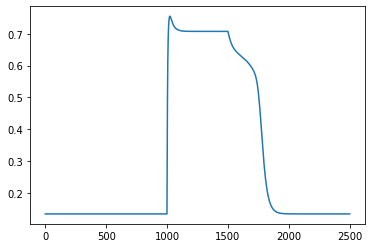

In [10]:
plt.plot(range(t_max-t_p),p_r)